### Мезомасштабная вихревая динамика в Лофотенской котловине

Вам предоставлены 4 поля на дату 20.06.2020 на регион центральной части Лофотенской котловины

- Поле спутниковой альтиметрии (файл adt.nc, https://data.marine.copernicus.eu/product/SEALEVEL_GLO_PHY_L4_MY_008_047/description)
 
- Поле температуры поверхности моря (файл sst.nc) из массива Global Ocean Sea Surface Temperature and Sea Ice Analysis (https://data.marine.copernicus.eu/product/SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001/description) 

- Поле скорости ветра (файл wind.nc) из реанализа CARRA (https://cds.climate.copernicus.eu/datasets/reanalysis-carra-single-levels?tab=overview) 

 - Поле концентрации хлорофилла (файлы chl_nn.nc и geo_coordinates.nc)  по данным Sentinel-3 (https://dataspace.copernicus.eu/)

В поле аномалий уровня выделено два вихря: циклон (отмечен красной точкой) и антициклон (синяя точка). Антициклон - это квазистационарный Лофотенский вихрь (https://en.wikipedia.org/wiki/Lofoten_Vortex).  

 - Как соотносятся поля альтиметрии и поля хлорофилла? 
 
 - Каким образом вихри влияют на распределение хлорофилла в океане в приведенном примере и соотносится ли это с общепринятой теорией? 

 - Есть ли взаимосвязь между вихрями, температурой и полем ветра? 
  
 - Подумайте, какие дополнительные расчеты на ваш взгляд нужно произвести и какие данные привлечь, чтобы лучше объяснить полученный результат

#### Подготовьте презентацию

Она должна содержать:

 - Краткое описание региона, особенности его гидрологического режима
 - Описание используемых в исследовании массивов данных 
 - Описание результатов, ваша интерпретация и выводы


In [106]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [107]:
#Загружаем данные adt
ds_adt = nc.Dataset('adt.nc','r')
ds_adt.variables.keys()
lon_adt = ds_adt.variables['longitude'][:]
lat_adt = ds_adt.variables['latitude'][:]
adt = ds_adt.variables['adt'][:]
adt = adt.squeeze()

#Загружаем данные sst
ds_sst = nc.Dataset('sst.nc','r')
ds_sst.variables.keys()
lon_sst = ds_sst.variables['longitude'][:]
lat_sst = ds_sst.variables['latitude'][:]
sst = ds_sst.variables['analysed_sst'][:]
sst = sst.squeeze()
sst = sst-273.15

#Загружаем данные ветра
ds_wind = nc.Dataset('wind.nc','r')
ds_wind.variables.keys()
lon_wind = ds_wind.variables['longitude'][:]
lat_wind = ds_wind.variables['latitude'][:]
#u = ds_wind.variables['u10'][:]
#v = ds_wind.variables['v10'][:]
#u = u.squeeze()
#v = v.squeeze()
speed = ds_wind.variables['si10'][:]
speed = speed.squeeze()

#Загружаем данные по хлорофиллу
ds_chl = nc.Dataset('chl_nn.nc','r')
geo = nc.Dataset('geo_coordinates.nc','r')
ds_chl.variables.keys()
ds_chl.variables.keys()
lon_chl = geo.variables['longitude'][:]
lat_chl = geo.variables['latitude'][:]
chl = ds_chl.variables['CHL_NN'][:]

#### Строим поле хлорофилла 

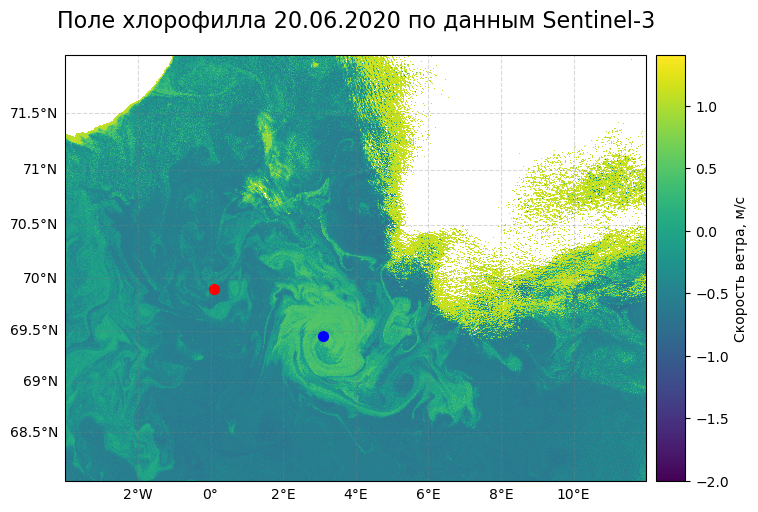

In [108]:
limits = [-4,12,68,72]

fig, ax = plt.subplots(figsize=(8, 15), subplot_kw={'projection': ccrs.Mercator()})

# Основной график
mesh = ax.pcolormesh(lon_chl, lat_chl, chl, 
                     cmap='viridis',
                     transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

ax.scatter(3.1, 69.45, c='blue', s=50, transform=ccrs.PlateCarree())
ax.scatter(0.1, 69.9, c='red', s=50, transform=ccrs.PlateCarree())

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)

cbar = plt.colorbar(mesh, cax=cax, label='Скорость ветра, м/с')
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.3, linestyle='--')
ax.set_extent(limits, crs=ccrs.PlateCarree())
gl.right_labels = False
gl.top_labels = False
ax.set_title('Поле хлорофилла 20.06.2020 по данным Sentinel-3', fontsize=16, pad=20) 
plt.show()

#### Строим поле альтиметрии 

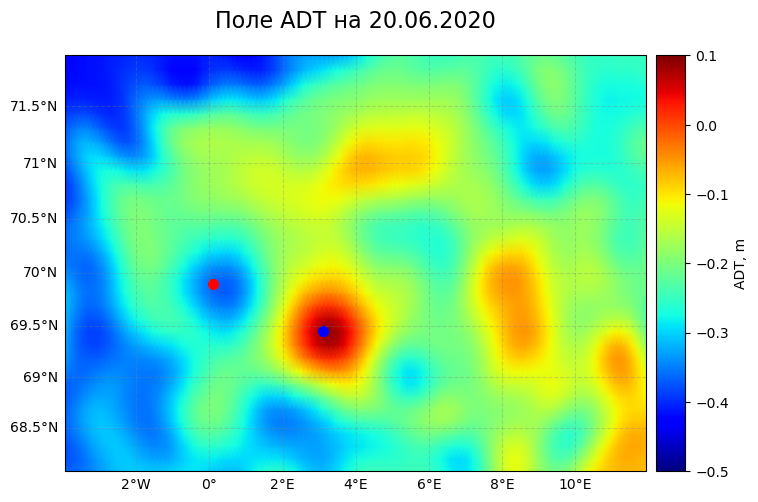

In [109]:
fig, ax = plt.subplots(figsize=(8, 15), subplot_kw={'projection': ccrs.Mercator()})

mesh = ax.pcolormesh(lon_adt, lat_adt, adt,shading='gouraud', 
                     cmap='jet', 
                     vmin=-0.5, 
                     vmax=0.1,
                     transform=ccrs.PlateCarree())
ax.scatter(3.1, 69.45, c='blue', s=50, transform=ccrs.PlateCarree())
ax.scatter(0.1, 69.9, c='red', s=50, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)
cbar = plt.colorbar(mesh, cax=cax, label='ADT, m')
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.3, linestyle='--')
gl.right_labels = False
gl.top_labels = False
ax.set_title('Поле ADT на 20.06.2020', fontsize=16, pad=20)  # Используйте pad для отступа
plt.show()

#### Строим поле SST

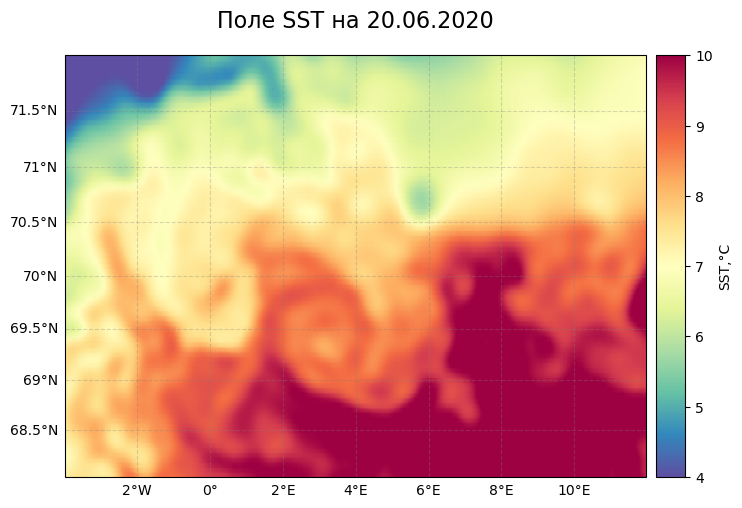

In [110]:
fig, ax = plt.subplots(figsize=(8, 15), subplot_kw={'projection': ccrs.Mercator()})
cmap = plt.cm.Spectral_r
# Основной график
mesh = ax.pcolormesh(lon_sst, lat_sst, sst,shading='gouraud', 
                     cmap=cmap, 
                     vmin=4, 
                     vmax=10,
                     transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)

# Добавляем цветовую шкалу
cbar = plt.colorbar(mesh, cax=cax, label='SST,°C')
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.3, linestyle='--')
gl.right_labels = False
gl.top_labels = False
ax.set_title('Поле SST на 20.06.2020', fontsize=16, pad=20) 
plt.show()

#### Строим поле скорости ветра

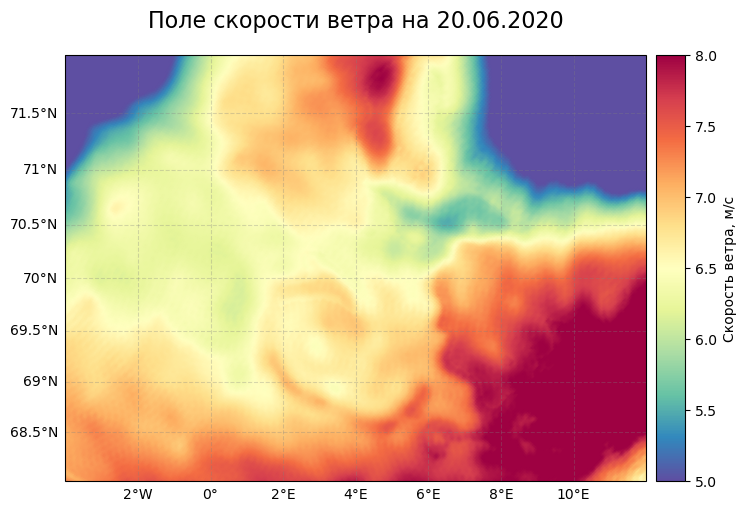

In [111]:
limits = [-4,12,68,72]

fig, ax = plt.subplots(figsize=(8, 15), subplot_kw={'projection': ccrs.Mercator()})
cmap = plt.cm.Spectral_r
# Основной график
mesh = ax.pcolormesh(lon_wind, lat_wind, speed,shading='gouraud', 
                     cmap=cmap, 
                     vmin=5, 
                     vmax=8,
                     transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)

cbar = plt.colorbar(mesh, cax=cax, label='Скорость ветра, м/с')
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.3, linestyle='--')
ax.set_extent(limits, crs=ccrs.PlateCarree())
gl.right_labels = False
gl.top_labels = False
ax.set_title('Поле скорости ветра на 20.06.2020', fontsize=16, pad=20)  # Используйте pad для отступа
plt.show()